# 데이터 경로 설정

In [5]:
import os

folder_path = "../Database/raw/Healthy_Subjects" 

# 파일 목록 출력
mat_files = [f for f in os.listdir(folder_path) if f.endswith(".mat")]
print("감지된 .mat 파일 목록:")
for f in mat_files:
    print("-", f)

감지된 .mat 파일 목록:
- subject1.mat
- subject10.mat
- subject2.mat
- subject3.mat
- subject4.mat
- subject5.mat
- subject6.mat
- subject7.mat
- subject8.mat
- subject9.mat


# .mat 파일 하나 열어서 구조 살펴보기

In [6]:
import scipy.io

sample_path = os.path.join(folder_path, mat_files[0])
data = scipy.io.loadmat(sample_path)

for key in data:
    if not key.startswith("__"):
        print(f" - {key}: shape = {data[key].shape}, dtype = {data[key].dtype}")

 - F3_A2: shape = (924, 6000), dtype = float64
 - C3_A2: shape = (924, 6000), dtype = float64
 - O1_A2: shape = (924, 6000), dtype = float64
 - F4_A1: shape = (924, 6000), dtype = float64
 - C4_A1: shape = (924, 6000), dtype = float64
 - O2_A1: shape = (924, 6000), dtype = float64
 - ROC_A1: shape = (924, 6000), dtype = float64
 - LOC_A2: shape = (924, 6000), dtype = float64
 - X1: shape = (924, 6000), dtype = float64
 - X2: shape = (924, 6000), dtype = float64
 - X3: shape = (924, 6000), dtype = float64


-> 총 924개의 30초 epoch, 각 epoch당 6000개의 샘플 (샘플링 주기 200Hz일 경우 30초 = 6000)

- F3_A2, F4_A1 : 전두엽 (Frontal), EEG
- C3_A2, C4_A1 : 중심 (Central), EEG
- 01_A2, 02_A1 : 후두엽 (Occipital), EEG
- ROC_A1 : 우측 안구 (Right Outer Canthus), EOG
- LOC_A2 : 좌측 안구 (Left Outer Canthus), EOF
- X1, X2, X3 : 일반적으로 EMG 또는 기타 센서 (근전도 등), EMG Other

참고 :
EEG는 뇌파, EOG는 안구 전위(눈의 움직임으로 인해 생기는 전위 차를 측정), EMG는 근전도 (근육 활동)

# 주요 채널 시각화

In [ ]:
mat_path = "../Database/raw/Healthy_Subjects/subject1.mat"

data = scipy.io.loadmat(mat_path)

# 시각화할 채널
channels = ['F3_A2', 'C3_A2', 'O1_A2', 'F4_A1', 'C4_A1', 'O2_A1', 'ROC_A1', 'LOC_A2', 'X1', 'X2', 'X3']

# 시각화 (앞 1 epoch = 6000 샘플)
time_range = slice(0, 6000)

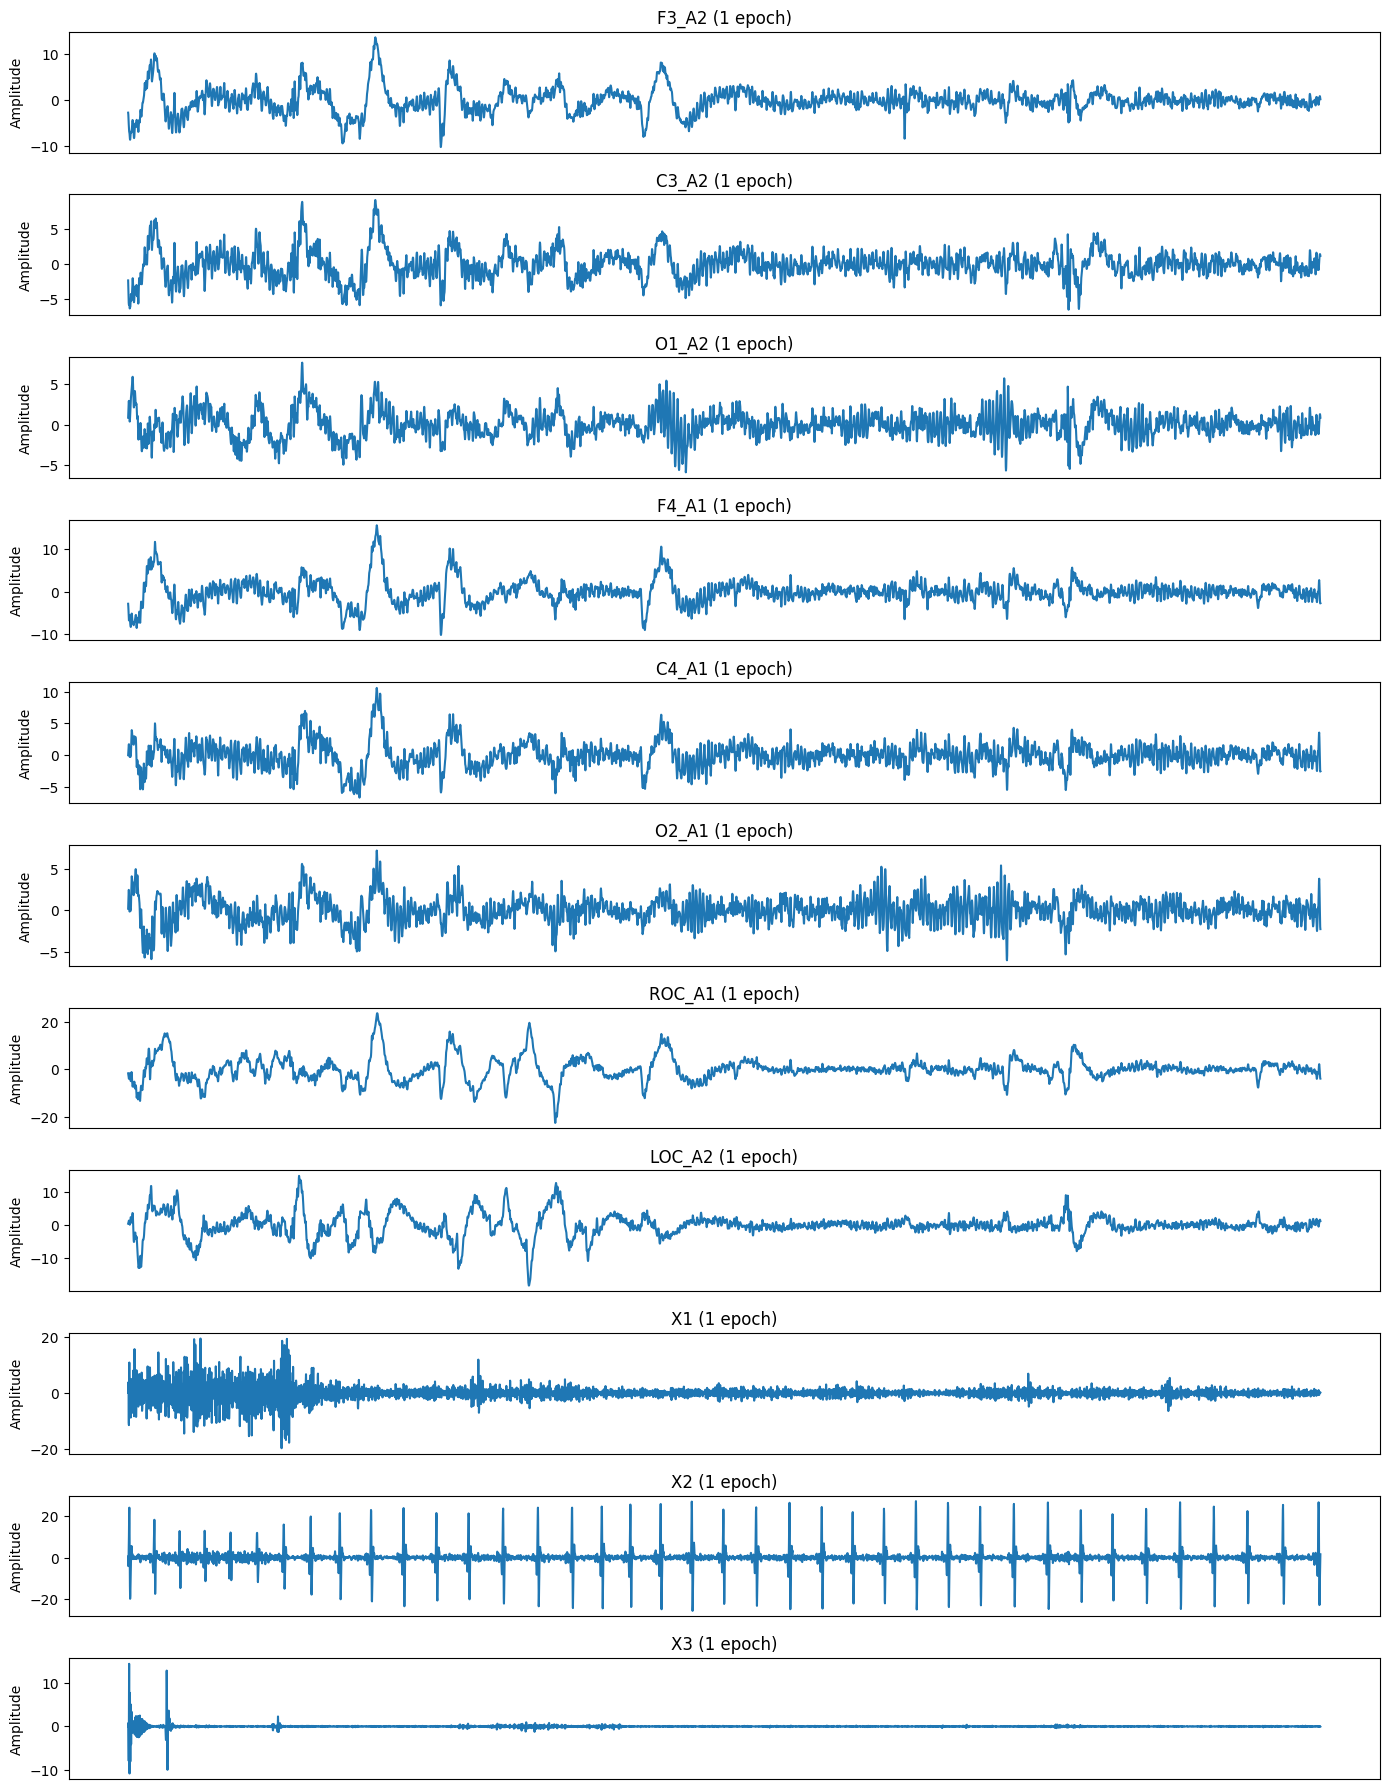

In [9]:
# 시각화

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 18))
for i, ch in enumerate(channels):
    if ch in data:
        signal = data[ch]
        plt.subplot(len(channels), 1, i + 1)
        plt.plot(signal[0, time_range])  # 첫 epoch의 신호 시각화
        plt.title(f"{ch} (1 epoch)")
        plt.ylabel("Amplitude")
        plt.xticks([])
plt.tight_layout()
plt.show()